# This code is to be used
# to replot apStar/apVisit visits for RV Shift Comparsion

In [1]:
#Import the apStar File
import astropy
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

classify = (input("LCO or APO: "))
fitsfile = (input("The 2MASS ID: "))
field = (input("What is the Field (be careful with capitalization): "))

if (classify == "APO"):
#APO Stars
    linkapo = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/apo25m/" + field + "/apStar-dr17-" + fitsfile + ".fits"
    apofit = astropy.utils.data.download_file(linkapo)
    hdulist = fits.open(apofit)
else:
#LCO Stars
    linklco = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/stars/lco25m/" + field + "/asStar-dr17-" + fitsfile + ".fits"
    lcofit = astropy.utils.data.download_file(linklco)
    hdulist = fits.open(lcofit)
    
spectra_hdu = hdulist[1]

spectra_data = spectra_hdu.data
spectra_data.shape
b=c=d=e=0

#Assign the data

len(spectra_data)
if len(spectra_data) < 4:
    print("Too little visits")
    b = 1
if len(spectra_data) < 5:
    print("Too little visits")
    c = 1
if len(spectra_data) < 6:
    print("Too little visits")
    d=1
if len(spectra_data) < 7:
    print("Too little visits")
    e=1

LCO or APO: APO
The 2MASS ID: 2M13482073+2815549
What is the Field (be careful with capitalization): M3


In [2]:
#Get all the apStar info to graph it later

crval = spectra_hdu.header['CRVAL1']
cdelt = spectra_hdu.header['CDELT1']
startwave = 10**crval
space = 10**cdelt
nwave = np.arange(8575)

def waves():
    nwave2 = startwave*(space**nwave)
    return nwave2

apstarwv = waves()

visit_one_data = spectra_data[2,:]
dfa1 = pd.DataFrame({'flux': visit_one_data})
if b==0:
    visit_two_data = spectra_data[3,:]
    dfa2 = pd.DataFrame({'flux': visit_two_data})
if c==0:
    visit_three_data = spectra_data[3,:]
    dfa3 = pd.DataFrame({'flux': visit_three_data})
if d==0:
    visit_four_data = spectra_data[4,:]
    dfa4 = pd.DataFrame({'flux': visit_four_data})
if e==0:
    visit_five_data = spectra_data[5,:]
    dfa5 = pd.DataFrame({'flux': visit_five_data})

In [3]:
#Get the apVisit file info from the apStar files, and split (also redo this after you check the RV values
#at the bottom to ensure you get the biggest shifted visits)

master = hdulist[0]
apvisit_1a = master.header['SFILE1']
apvisit_1 = apvisit_1a.split('-')
if b==0:
    apvisit_2a = master.header['SFILE2']
    apvisit_2 = apvisit_2a.split('-')
if c==0:
    apvisit_3a = master.header['SFILE3']
    apvisit_3 = apvisit_3a.split('-')
if d==0:
    apvisit_4a = master.header['SFILE4']
    apvisit_4 = apvisit_4a.split('-')
if e==0:
    apvisit_5a = master.header['SFILE5']
    apvisit_5 = apvisit_5a.split('-')

In [4]:
#Download the apvisit files
if (classify == "APO"):
    link1 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/apo25m/" + master.header['FIELD'] + "/" + apvisit_1[2] + "/" + apvisit_1[3] + "/" + apvisit_1a
    apvisit1 = astropy.utils.data.download_file(link1)
else:
    link1 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/lco25m/" + master.header['FIELD'] + "/" + apvisit_1[2] + "/" + apvisit_1[3] + "/" + apvisit_1a
    apvisit1 = astropy.utils.data.download_file(link1)
    
if b==0:
    if (classify == "APO"):
        link2 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/apo25m/" + master.header['FIELD'] + "/" + apvisit_2[2] + "/" + apvisit_2[3] + "/" + apvisit_2a
        apvisit2 = astropy.utils.data.download_file(link2)
    else:
        link2 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/lco25m/" + master.header['FIELD'] + "/" + apvisit_2[2] + "/" + apvisit_2[3] + "/" + apvisit_2a
        apvisit2 = astropy.utils.data.download_file(link2)
if c==0:
    if (classify == "APO"):
        link3 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/apo25m/" + master.header['FIELD'] + "/" + apvisit_3[2] + "/" + apvisit_3[3] + "/" + apvisit_3a
        apvisit3 = astropy.utils.data.download_file(link3)
    else:
        link3 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/lco25m/" + master.header['FIELD'] + "/" + apvisit_3[2] + "/" + apvisit_3[3] + "/" + apvisit_3a
        apvisit3 = astropy.utils.data.download_file(link3)
        
if d==0:
    if (classify == "APO"):
        link4 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/apo25m/" + master.header['FIELD'] + "/" + apvisit_4[2] + "/" + apvisit_4[3] + "/" + apvisit_4a
        apvisit4 = astropy.utils.data.download_file(link4)
    else:
        link4 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/lco25m/" + master.header['FIELD'] + "/" + apvisit_4[2] + "/" + apvisit_4[3] + "/" + apvisit_4a
        apvisit4 = astropy.utils.data.download_file(link4)
if e==0:
    if (classify == "APO"):
        link5 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/apo25m/" + master.header['FIELD'] + "/" + apvisit_5[2] + "/" + apvisit_5[3] + "/" + apvisit_5a
        apvisit5 = astropy.utils.data.download_file(link5)
    else:
        link5 = "https://dr17.sdss.org/sas/dr17/apogee/spectro/redux/dr17/visit/lco25m/" + master.header['FIELD'] + "/" + apvisit_5[2] + "/" + apvisit_5[3] + "/" + apvisit_5a
        apvisit5 = astropy.utils.data.download_file(link5)

In [5]:
#Extract Spectra Data into data python files
apvisit_1_hdulist = fits.open(apvisit1)
apvis1_spectra = apvisit_1_hdulist[1]
if b==0:
    apvisit_2_hdulist = fits.open(apvisit2)
    apvis2_spectra = apvisit_2_hdulist[1]
if c==0:
    apvisit_3_hdulist = fits.open(apvisit3)
    apvis3_spectra = apvisit_3_hdulist[1]
if d==0:
    apvisit_4_hdulist = fits.open(apvisit4)
    apvis4_spectra = apvisit_4_hdulist[1]
if e==0:
    apvisit_5_hdulist = fits.open(apvisit5)
    apvis5_spectra = apvisit_5_hdulist[1]

In [6]:
#Get the relevant fluxes and reshape the data into 1 long list
flux1 = []
for i in range(3):
    for j in range(4095):
        flux1.append(apvis1_spectra.data[i, j])
if b==0:
    flux2=[]
    for k in range(3):
        for q in range(4095):
            flux2.append(apvis2_spectra.data[k, q])
if c==0:
    flux3=[]
    for r in range(3):
        for t in range(4095):
            flux3.append(apvis3_spectra.data[r, t])
if d==0:
    flux4=[]
    for m in range(3):
        for v in range(4095):
            flux4.append(apvis4_spectra.data[m, v])
if e==0:
    flux5=[]
    for w in range(3):
        for u in range(4095):
            flux5.append(apvis5_spectra.data[w, u])
i = j = k = q = r = t = m = v = w = u = 0

In [7]:
#Get the wavelength files and spit them into python data files
apvisit_1_hdulist = fits.open(apvisit1)
apvis1_wv = apvisit_1_hdulist[4]
if b==0:
    apvisit_2_hdulist = fits.open(apvisit2)
    apvis2_wv = apvisit_2_hdulist[4]
if c==0:
    apvisit_3_hdulist = fits.open(apvisit3)
    apvis3_wv = apvisit_3_hdulist[4]
if d==0:
    apvisit_4_hdulist = fits.open(apvisit4)
    apvis4_wv = apvisit_4_hdulist[4]
if e==0:
    apvisit_5_hdulist = fits.open(apvisit5)
    apvis5_wv = apvisit_5_hdulist[4]

In [8]:
#Get the relevant wavelengths and reshape the data into 1 long list
wv1 = []
for i in range(3):
    for j in range(4095):
        wv1.append(apvis1_wv.data[i, j])

df1 = pd.DataFrame({"flux": flux1, "wv": wv1})
if b==0:
    wv2=[]
    for k in range(3):
        for q in range(4095):
            wv2.append(apvis2_wv.data[k, q])
    df2 = pd.DataFrame({"flux": flux2, "wv": wv2})
if c==0:
    wv3=[]
    for r in range(3):
        for t in range(4095):
            wv3.append(apvis3_wv.data[r, t])
    df3 = pd.DataFrame({"flux": flux3, "wv": wv3})
if d==0:
    wv4=[]
    for m in range(3):
        for v in range(4095):
            wv4.append(apvis4_wv.data[m, v])
    df4 = pd.DataFrame({"flux": flux4, "wv": wv4})
if e==0:
    wv5=[]
    for w in range(3):
        for u in range(4095):
            wv5.append(apvis5_wv.data[w, u])
    df5 = pd.DataFrame({"flux": flux5, "wv": wv5})

In [9]:
#Setting Maximum/Minimum on Graph limits
max_val1 = 0
max_val2 = 0
max_val3 = 0
max_val4 = 0
max_val5 = 0
max_val_final = 0
counter = 0

min_val1 = 0
min_val2 = 0
min_val3 = 0
min_val4 = 0
min_val5 = 0
min_val_final = 0
mincounter = 0

In [10]:
#Get 90th to 10th Percentile Values of Max/Min flux
visit_1_per = np.percentile(df1.flux,[90, 10])
if b==0:
    visit_2_per = np.percentile(df2.flux,[90, 10])
if c==0:
    visit_3_per = np.percentile(df3.flux,[90, 10])
if d==0:
    visit_4_per = np.percentile(df4.flux,[90, 10])
if e==0:
    visit_5_per = np.percentile(df5.flux,[90, 10])

In [11]:
#Avg Maximum (90th < x < 10th percentile) Flux
for i in range (1):
    max_val1 = visit_1_per[0]
    counter += 1
    if b==0:
        max_val2 = visit_2_per[0]
        counter += 1
    if c==0:
        max_val3 = visit_3_per[0]
        counter += 1
    if d==0:
        max_val4 = visit_4_per[0]
        counter += 1
    if e==0:
        max_val5 = visit_5_per[0]
        counter += 1
    if counter == 0:
        max_val_final = 400    
    else:
        max_val_final = ((max_val1 + max_val2 + max_val3 + max_val4 + max_val5)/counter) + 150

In [12]:
#Avg Minimum (90th < x < 10th percentile) Flux
for i in range (1):
    min_val1 = visit_1_per[1]
    mincounter += 1
    if b==0:
        min_val2 = visit_2_per[1]
        mincounter += 1
    if c==0:
        min_val3 = visit_3_per[1]
        mincounter += 1
    if d==0:
        min_val4 = visit_4_per[1]
        mincounter += 1
    if e==0:
        min_val5 = visit_5_per[1]
        mincounter += 1
    if mincounter == 0:
        min_val_final = -100    
    else:
        min_val_final = ((min_val1 + min_val2 + min_val3 + min_val4 + min_val5)/mincounter) - 150

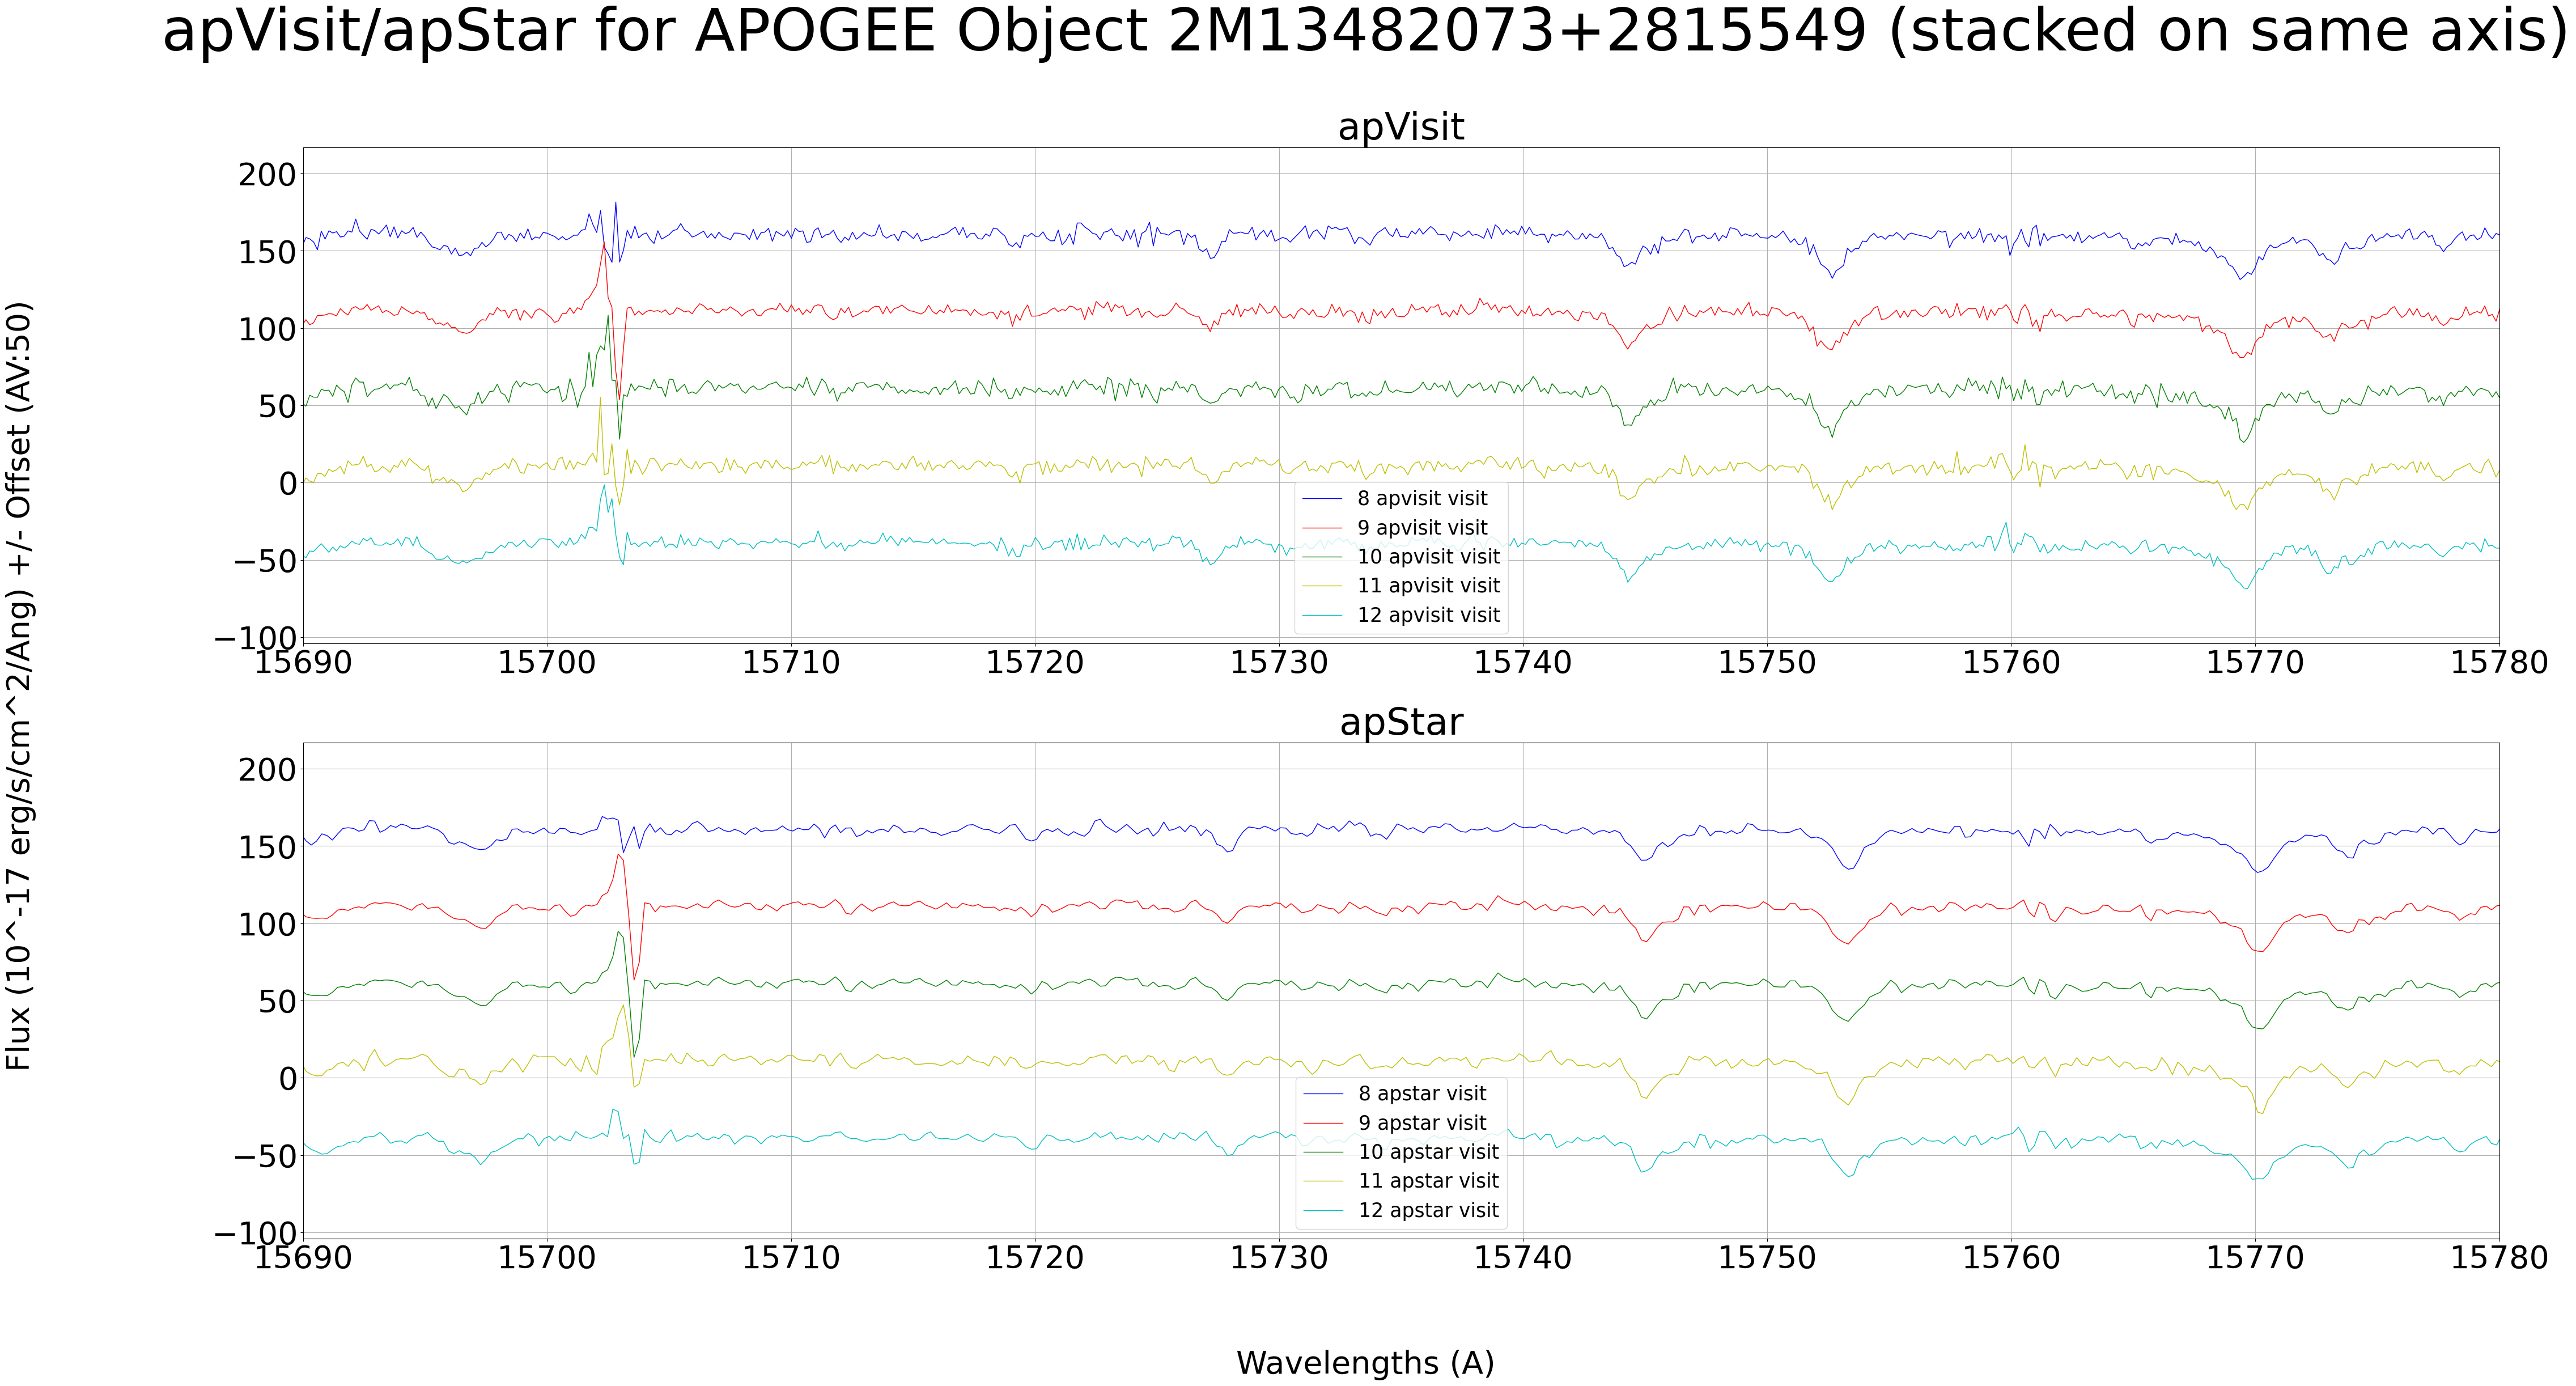

In [13]:
import matplotlib.pyplot as plt

#Saving the plot, larger
matplotlib.rcParams.update({'font.size': 40})
fig2, axe = plt.subplots(2, figsize = (50,25))

axe[0].plot(df1.wv, df1.flux+100, label = '1 apvisit visit', linewidth = 1,c ='b')
if b==0:
    axe[0].plot(df2.wv, df2.flux+50, label='2 apvisit visit',  linewidth = 1, c='r')
if c==0:
    axe[0].plot(df3.wv, df3.flux, label='3 apvisit visit', linewidth = 1, c='g')
if d==0:
    axe[0].plot(df4.wv, df4.flux-50, label='4 apvisit visit', linewidth = 1, c='y')
if e==0:
    axe[0].plot(df5.wv, df5.flux-100, label='5 apvisit visit', linewidth = 1, c='c')
    
axe[1].plot(apstarwv, dfa1.flux+100, label='1 apstar visit',  linewidth = 1, c='b')
if b==0:
    axe[1].plot(apstarwv, dfa2.flux+50, label='2 apstar visit',  linewidth = 1, c='r')
if c==0:
    axe[1].plot(apstarwv, dfa3.flux, label='3 apstar visit', linewidth = 1, c='g')
if d==0:
    axe[1].plot(apstarwv, dfa4.flux-50, label='4 apstar visit', linewidth = 1, c='y')
if e==0:
    axe[1].plot(apstarwv, dfa5.flux-100, label='5 apstar visit', linewidth = 1, c='c')

axe[0].set_xlim([15690, 15780])
axe[1].set_xlim([15690, 15780])
axe[0].set_ylim([min_val_final, max_val_final])
axe[1].set_ylim([min_val_final, max_val_final])

fig2.suptitle("apVisit/apStar for APOGEE Object " + fitsfile +  " (stacked on same axis)", fontsize=75)
fig2.supxlabel('Wavelengths (A)', fontsize=40)
fig2.supylabel('Flux (10^-17 erg/s/cm^2/Ang) +/- Offset (AV:50)', fontsize=40)

axe[0].legend(fontsize = 25, loc = "best")
axe[0].set_title("apVisit")
axe[1].legend(fontsize = 25, loc = "best")
axe[1].set_title("apStar")
axe[0].grid()
axe[1].grid()

plt.savefig("Object " +fitsfile + ".png", dpi=300)


plt.show()

In [14]:
#Radial Velocity Array from visits listed

rvbin = hdulist[9]
rvbin.header

RV = rvbin.header['TTYPE5']
RVdata = rvbin.data[RV]

print(RVdata)

[-12.93034971 -13.21622956 -12.83467408 -12.82205255 -12.75098181
 -12.61602999 -10.48149287 -10.33610139  11.58652736  17.83809458
  17.56278721  17.99721468  18.14728869  18.44737545  18.68872108
  24.19051917  24.28782016  25.26586022  26.51144466 -27.06050045
 -27.21440794 -25.85464852 -26.02893932 -25.15553678 -20.00605013
 -19.7901097  -19.28157651 -18.77622057 -18.32659346 -17.85700532
 -17.58830067  -9.47012127  -7.39445711]


In [15]:
#MJD adjustments to our RV

JD = rvbin.header['TTYPE2']
JDdata = rvbin.data[JD]


minRV = float('inf')
maxRV = -float('inf')

for i in range(len(RVdata)):
    if RVdata[i] > maxRV:
        maxRV = RVdata[i]
        print(maxRV)
        print("Max!")
    if RVdata[i] < minRV:
        minRV = RVdata[i]
        print(minRV)
        print("Min!")
        
del_RV = maxRV - minRV
t_one = JDdata[np.where(RVdata==maxRV)]
t_two = JDdata[np.where(RVdata==minRV)]
del_time = t_one - t_two

if del_time < 0:
    del_time = -del_time
del_RV

-12.930349710821313
Max!
-12.930349710821313
Min!
-13.21622955703188
Min!
-12.834674084125293
Max!
-12.822052553123012
Max!
-12.750981806544221
Max!
-12.61602999285699
Max!
-10.481492865450473
Max!
-10.336101387029105
Max!
11.586527364047688
Max!
17.838094575324696
Max!
17.997214682269064
Max!
18.14728868506615
Max!
18.447375448292966
Max!
18.688721083166882
Max!
24.190519168595262
Max!
24.28782015776356
Max!
25.265860221803628
Max!
26.511444659780096
Max!
-27.06050045145034
Min!
-27.214407939302273
Min!


53.72585259908237

In [16]:
#Getting delta RV max
del_time_g = del_time / 86400
del_RV_max = del_RV/del_time_g
del_RV_max

array([22603.71859299])